In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [3]:
folder = '/content/drive/MyDrive/FinalProject/Train1/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('Bus'):
    output= 1.0
  if file.startswith('Car'):
    output= 2.0
  if file.startswith('Motorbike'):
    output= 3.0
  if file.startswith('Plane'):
    output= 4.0
  if file.startswith('Truck'):
    output= 5.0
  if file.startswith('Helicopter'):
    output= 6.0
  if file.startswith('Boat'):
    output= 7.0
  if file.startswith('Ship'):
    output= 8.0
  if file.startswith('Bicycle'):
    output= 9.0
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/FinalProject/FinalProject1.npy', photos)
save('/content/drive/MyDrive/FinalProject/FinalProject2.npy', labels)

(29327, 40, 40, 3) (29327,)


In [5]:
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [6]:
print(test_x.shape, train_x.shape)

(1466, 40, 40, 3) (27861, 40, 40, 3)


In [7]:
train_x = train_x.reshape((27861, 40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((1466, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [8]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,10)
test_y = to_categorical(test_y,10)

In [19]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 40
epochs = 15
classes = 10

In [20]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [21]:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(512, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                      

In [22]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/15
697/697 [==============================] - 300s 428ms/step - loss: 1.2268 - accuracy: 0.5576
Epoch 2/15
697/697 [==============================] - 301s 432ms/step - loss: 0.7504 - accuracy: 0.7450
Epoch 3/15
697/697 [==============================] - 294s 422ms/step - loss: 0.5607 - accuracy: 0.8078
Epoch 4/15
697/697 [==============================] - 299s 429ms/step - loss: 0.4338 - accuracy: 0.8531
Epoch 5/15
697/697 [==============================] - 297s 427ms/step - loss: 0.3371 - accuracy: 0.8836
Epoch 6/15
697/697 [==============================] - 293s 420ms/step - loss: 0.2793 - accuracy: 0.9055
Epoch 7/15
697/697 [==============================] - 295s 423ms/step - loss: 0.2908 - accuracy: 0.9051
Epoch 8/15
697/697 [==============================] - 296s 424ms/step - loss: 0.2493 - accuracy: 0.9188
Epoch 9/15
697/697 [==============================] - 293s 421ms/step - loss: 0.2123 - accuracy: 0.9301
Epoch 10/15
697/697 [==============================] - 290s 416m

In [25]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

46/46 [==============================] - 3s 62ms/step - loss: 3.9967 - accuracy: 0.5989
Test accuracy: 0.5989086031913757


1/1 [==============================] - 0s 22ms/step
Bus


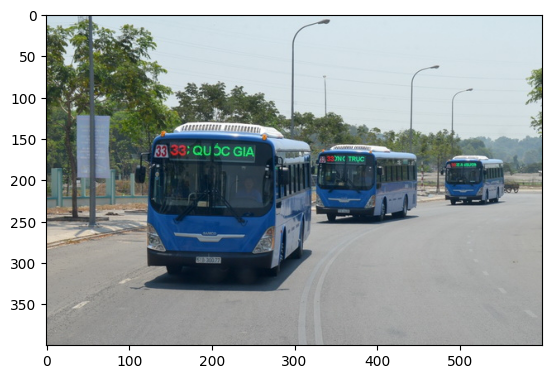

1/1 [==============================] - 0s 22ms/step
Plane


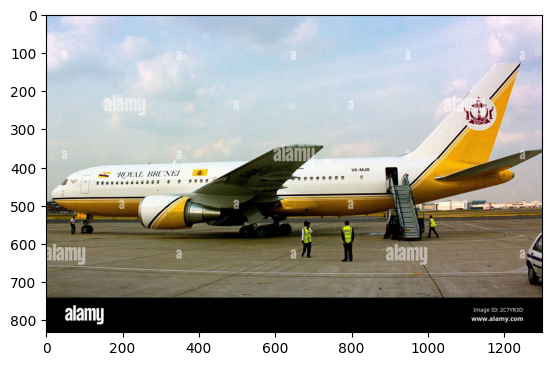

1/1 [==============================] - 0s 29ms/step
Boat


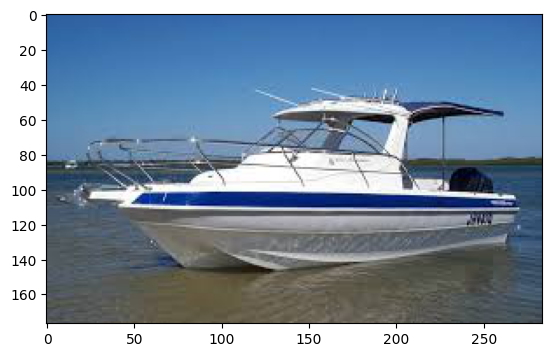

1/1 [==============================] - 0s 22ms/step
Bicycle


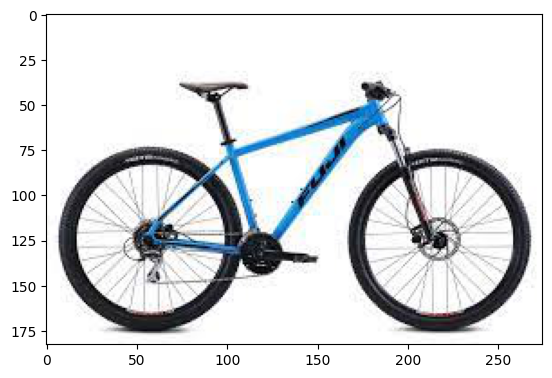

1/1 [==============================] - 0s 24ms/step
Truck


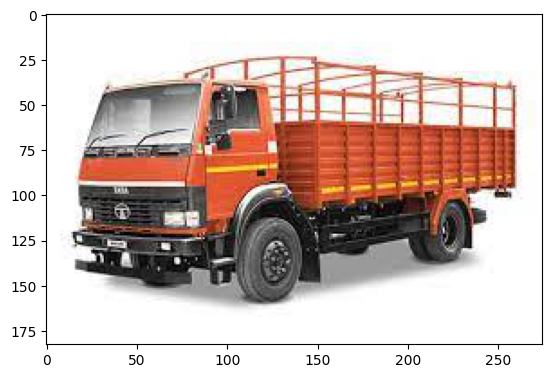

1/1 [==============================] - 0s 26ms/step
Motorbike


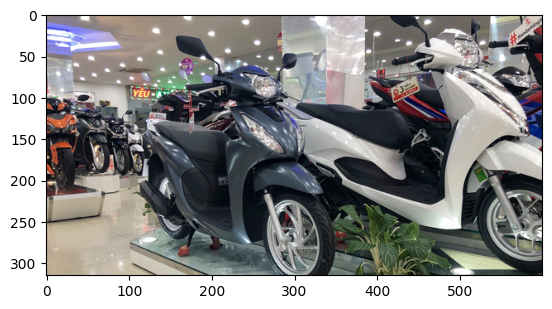

1/1 [==============================] - 0s 34ms/step
Car


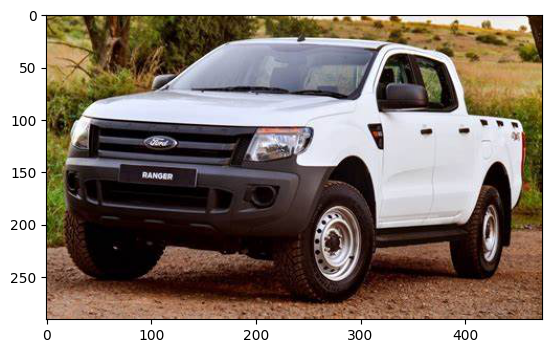

1/1 [==============================] - 0s 28ms/step
Helicopter


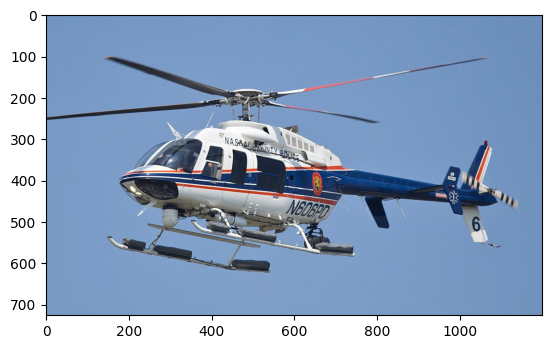

1/1 [==============================] - 0s 34ms/step
Ship


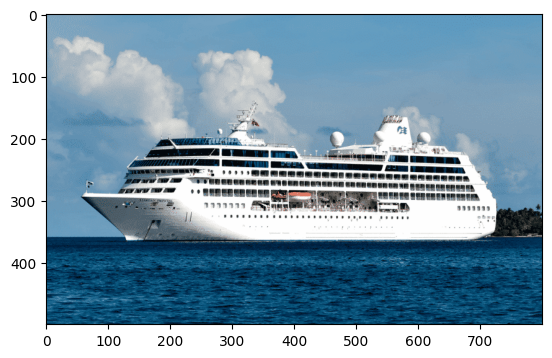

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/FinalProject/Check/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','Bus', 'Car', 'Motorbike', 'Plane', 'Truck', 'Helicopter', 'Boat', 'Ship', 'Bicycle']
  print(class_name[result])
  plt.show()